# Import needed packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Image reading, writing, and plotting
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Numpy
import numpy as np

#File management
import pandas as pd
import os
import json

#Extract Colors
import colorgram

#Random
import random

#Metrics
from utility.evaluation import getMetrics, plot_evaluation

%matplotlib inline

# Setup prediction CSV

In [104]:
#randomly pull images instead of by dex order (prevents evolution intuition)
randomized_idces = random.sample(range(0, len(gen_df)), len(gen_df))

In [4]:
gen_folder = "xydex"
num = 7
num_batches = 10
myName = "aaTariq"

if num == 1:
    min_bnd = 1
    max_bnd = 151

elif num == 2:
    min_bnd = 152
    max_bnd = 251

elif num == 3:
    min_bnd = 252
    max_bnd = 386

elif num == 4:
    min_bnd = 387
    max_bnd = 493

elif num == 5:
    min_bnd = 494
    max_bnd = 649

elif num == 6:
    min_bnd = 650
    max_bnd = 721

elif num == 7:
    min_bnd = 722
    max_bnd = 809

else:
    print("This generation doesn't exist at the time of the creation of this code")
    print("Please manually add the generation index to the if/else case")
    raise ValueError("The Generation doesn't exist")
            

data_folder = os.path.join(os.getcwd(), "data")
gen_folder = os.path.join(data_folder, gen_folder)
df = pd.read_csv(os.path.join(gen_folder, "aa_masterlist.csv"))

# Define Function to output Pokemon pictures and take in guesses

In [108]:
def makeCSVPart(idces, label="Guess", part="100"):
    guess_list = []
    
    for i in idces:

        row = dict(zip(row_keys, row_vals))

        pkm = gen_df["pokemon"].iloc[i]
        sprite_loc = os.path.join(gen_folder, pkm)
        sprite = mpimg.imread(sprite_loc)
        plt.imshow(sprite)
        plt.show(block=False)

        #Gather Type 1
        print(class_dict)
        flag = True
        while(flag):
            type1 = input("Enter the First Type (based on the index) :: ")
            #See if the input is actually an integer
            try:
                type1 = int(type1)
            except ValueError as error:
                continue
            if(type1 in class_dict):
                #The first type can't be none
                if(type1 != 18):
                    flag = False

        row[class_dict[type1]] = 1

        #Gather Type 2
        print(class_dict)
        flag = True
        while(flag):
            type2 = input("Enter the Second Type (based on the index :: ")
            #See if the input is actually an integer
            try:
                type2 = int(type2)
            except ValueError as error:
                continue
            if(type2 in class_dict):
                flag = False

        #Set Type 2
        #if Type2 is None, don't change the label vector
        if type2 != 18:
            row[class_dict[type2]] = 1

        #Add the extra information and append to guess_list
        row["pokemon"] = pkm
        row["dex_number"] = gen_df["dex_number"].iloc[i]
        guess_list.append(row)
    
    guess_df = pd.DataFrame(guess_list, columns=list(gen_df))
    guess_df.sort_values("dex_number", inplace = True, ascending = True)
    write_guess = guess_df.to_csv(os.path.join(gen_folder, label+part+".csv"), 
                                 encoding = "utf-8", index=False)
    print("**********************************")
    print("Finished :: ", label+part+".csv")
    print("*********************************")
    

# Save guesses into smaller csv files (to avoid any problems midway during Pokemon identification)

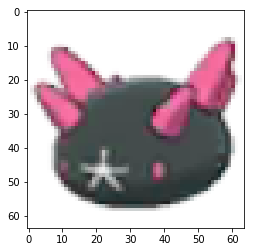

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 16
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 3


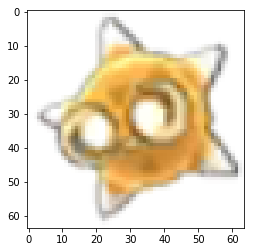

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 12
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 5


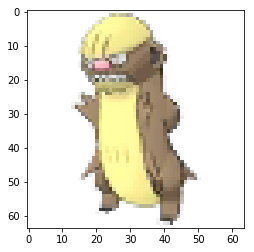

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


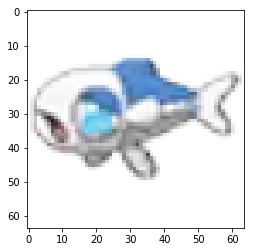

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


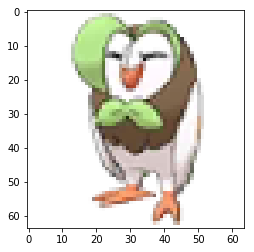

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 16
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


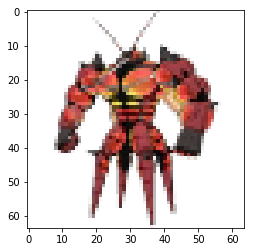

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 1
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 6


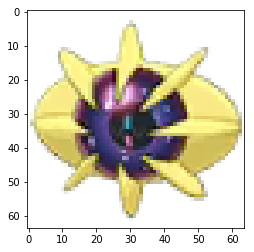

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 16
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 5


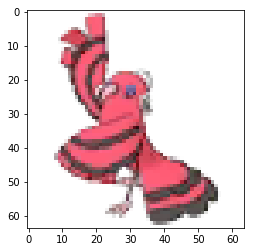

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 9
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


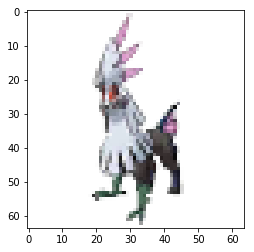

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


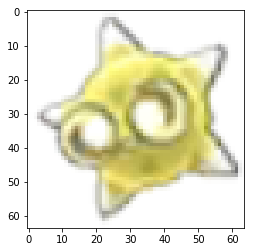

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 12
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 5


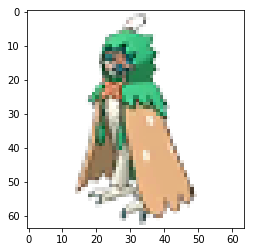

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


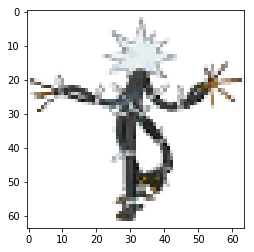

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 12
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 11
**********************************
Finished ::  aaTariq0.csv
*********************************


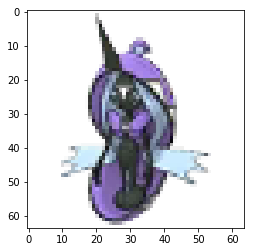

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 16


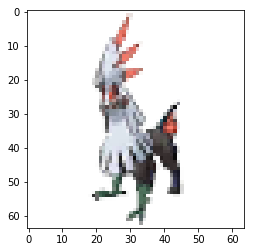

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 9
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


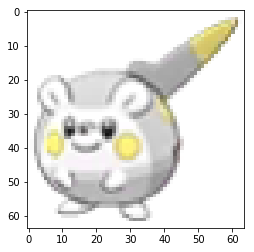

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 12
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 12


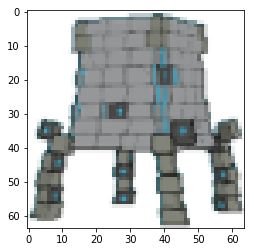

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 5
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 5


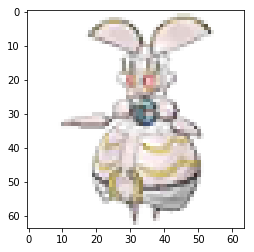

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 17
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 8


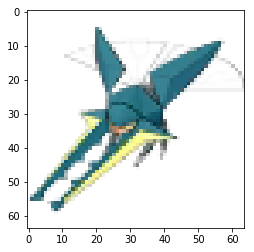

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 7
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


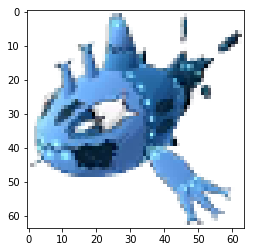

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 11


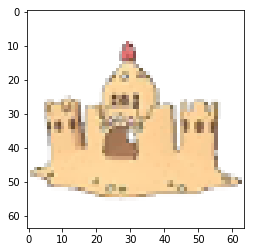

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 4
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 4


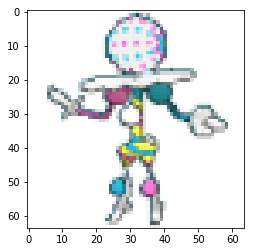

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


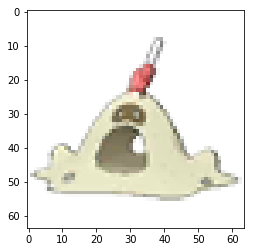

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 4
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 4


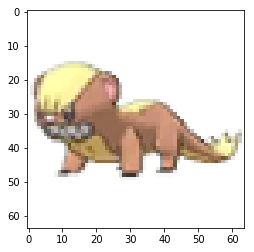

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


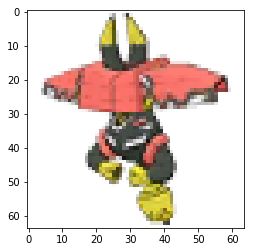

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 2
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 9
**********************************
Finished ::  aaTariq1.csv
*********************************


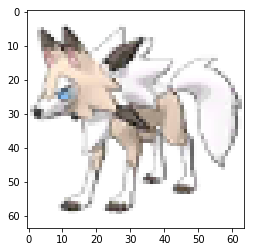

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 17
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


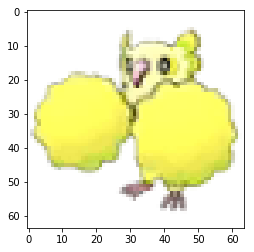

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 13
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


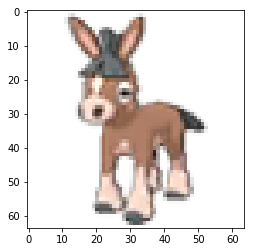

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 1
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


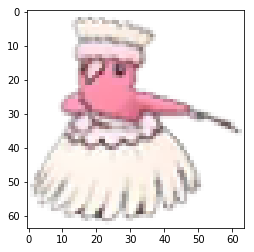

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 17
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


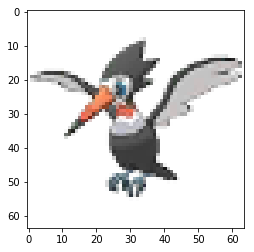

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


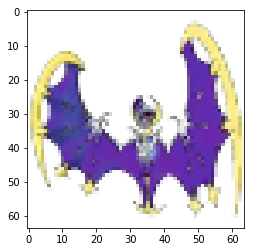

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 16
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


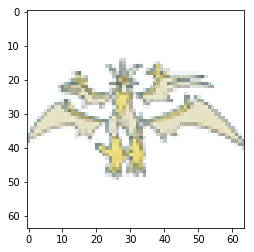

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 8
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


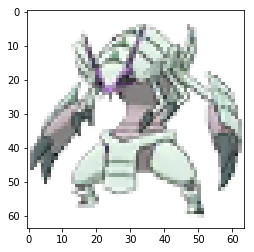

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 6
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 3


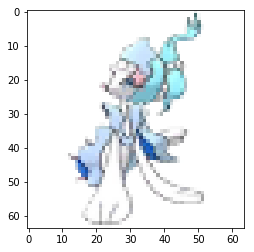

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


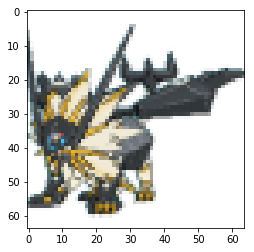

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 8
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 16


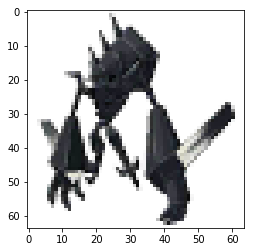

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 16
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 6


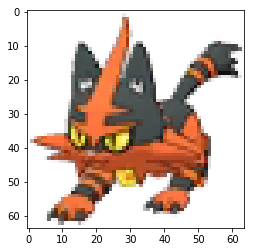

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 9
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 16
**********************************
Finished ::  aaTariq2.csv
*********************************


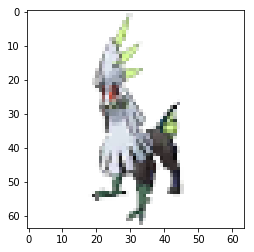

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 11


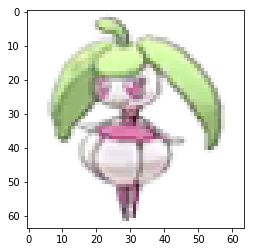

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 17
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 11


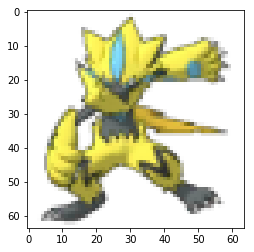

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 1
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 12


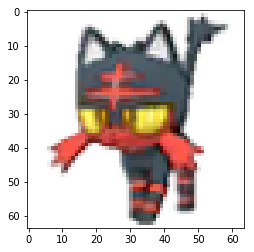

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 16
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 9


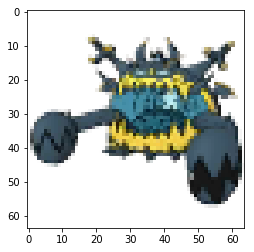

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 16
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


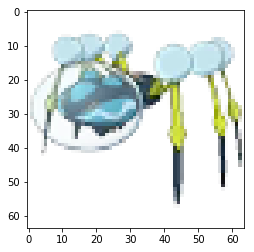

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 6
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


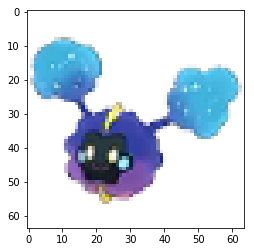

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 17
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 7


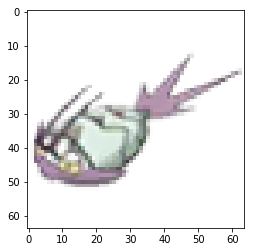

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 6
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 6


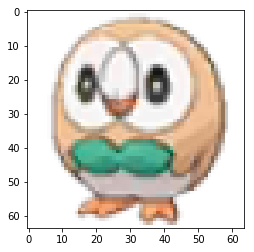

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 2
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 11


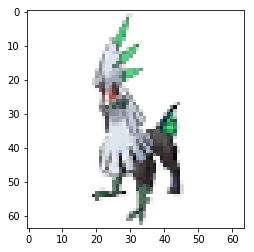

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


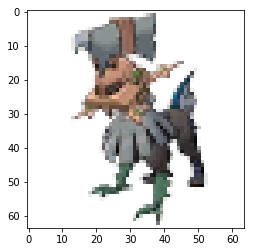

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 5
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 
Enter the Second Type (based on the index :: 16


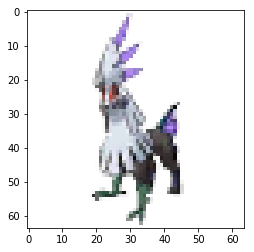

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 7
**********************************
Finished ::  aaTariq3.csv
*********************************


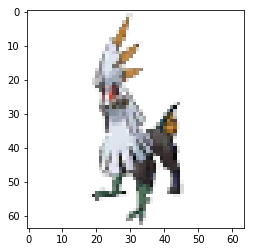

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 4
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


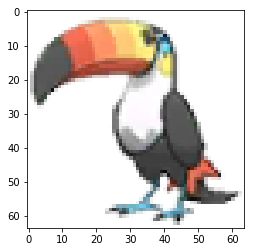

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 2
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


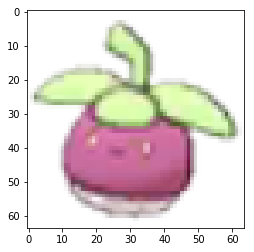

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 17


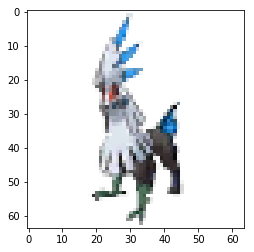

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


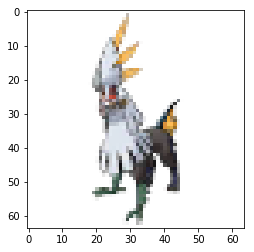

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 4
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


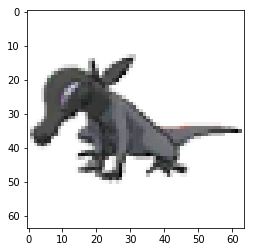

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 16
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 16


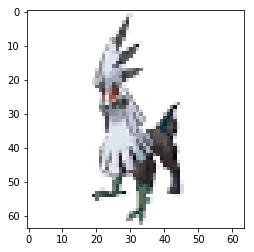

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 16
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


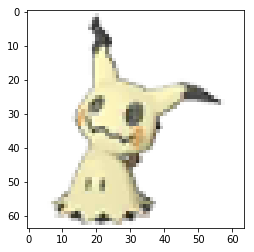

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 7
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 12


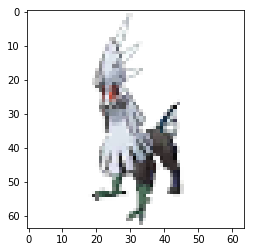

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 8
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


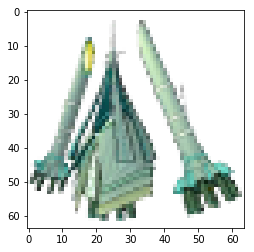

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 8
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 13


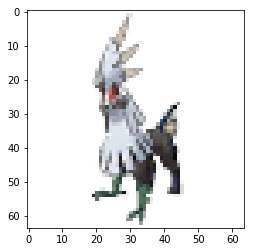

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 17
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 17


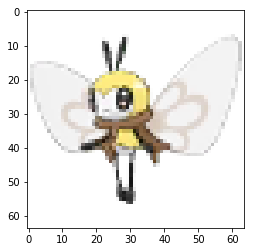

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 2
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 6
**********************************
Finished ::  aaTariq4.csv
*********************************


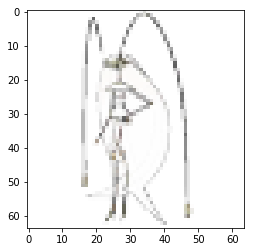

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 6
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 8


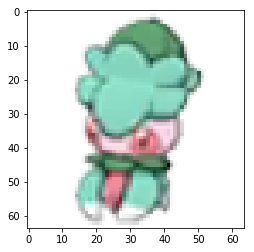

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 6


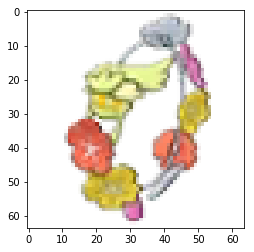

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 11


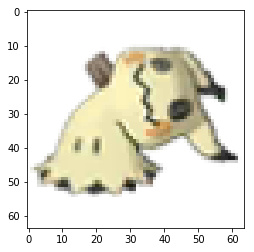

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 12
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 7


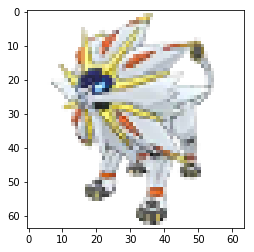

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 8
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 9


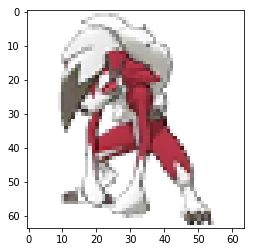

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 1
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 16


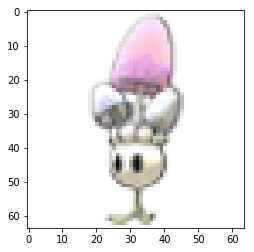

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 17


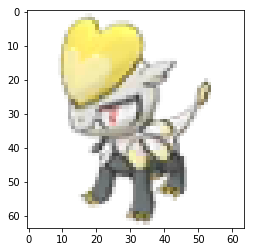

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 15
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 15


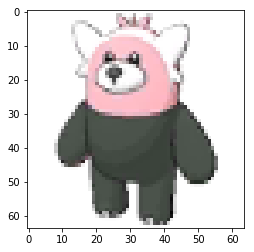

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 1
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


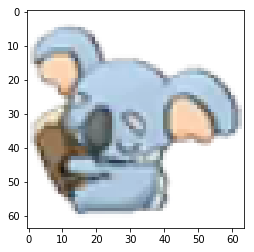

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


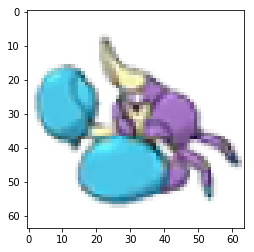

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


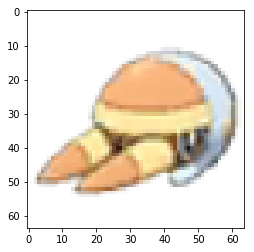

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 6
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 6
**********************************
Finished ::  aaTariq5.csv
*********************************


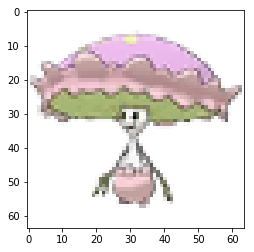

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 14


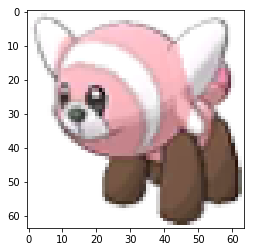

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


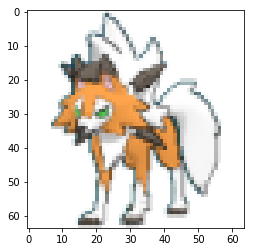

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 4
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


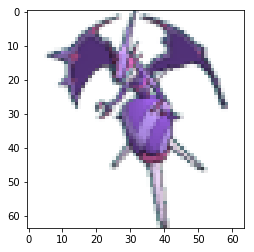

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 15
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 3


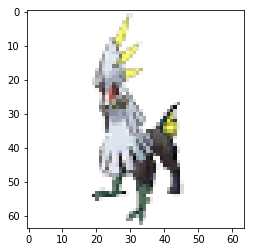

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 12
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 12


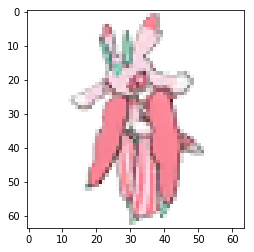

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 6
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


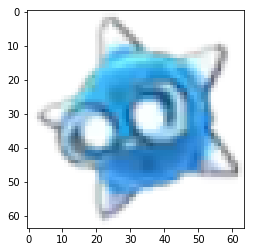

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


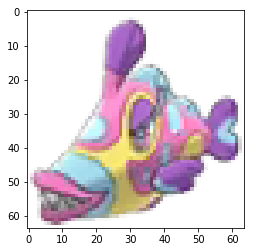

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


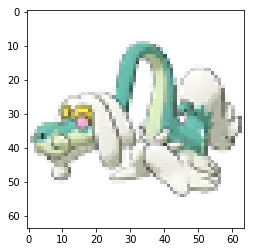

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 15
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


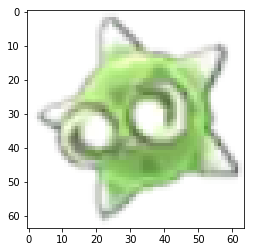

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 11


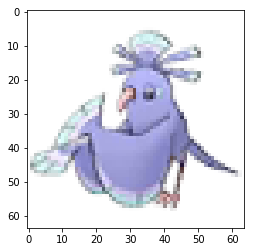

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 14
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


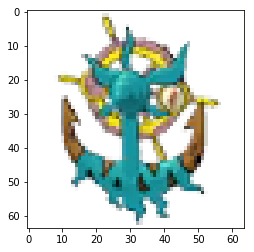

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 7
**********************************
Finished ::  aaTariq6.csv
*********************************


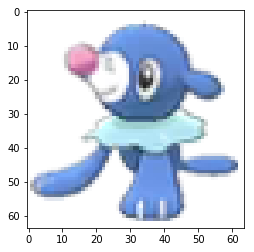

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


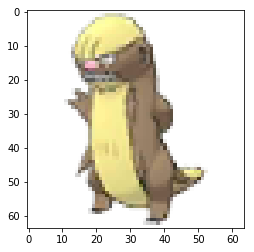

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


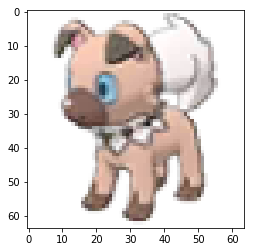

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


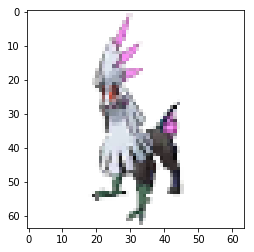

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 3
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 3


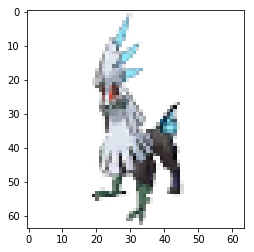

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 1
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 14


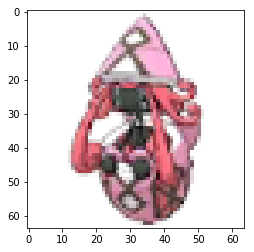

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 2
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 13


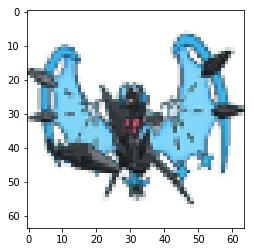

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: `5
Enter the First Type (based on the index) :: 2
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 16


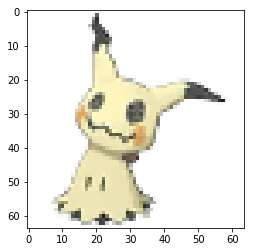

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 7
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 12


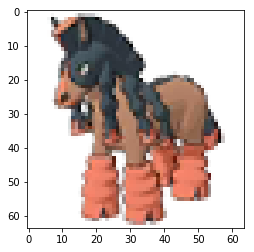

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 16
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 9


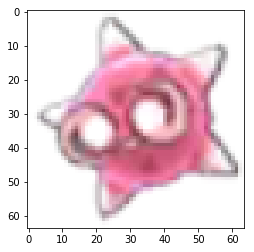

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 13
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 5


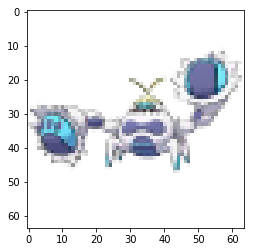

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


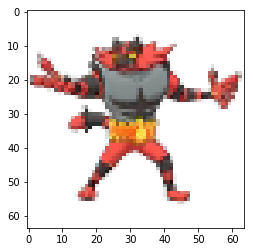

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 1
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 9
**********************************
Finished ::  aaTariq7.csv
*********************************


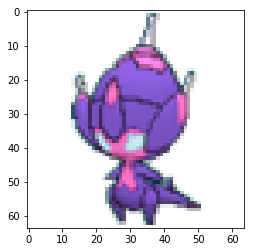

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 3
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 15


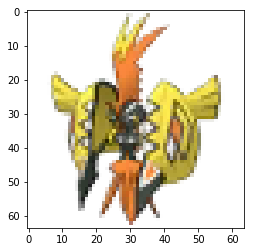

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 12
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


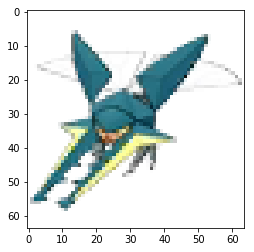

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 2
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 6


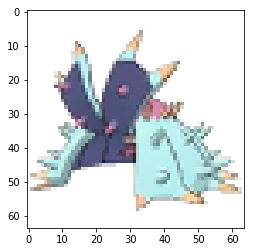

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 3
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


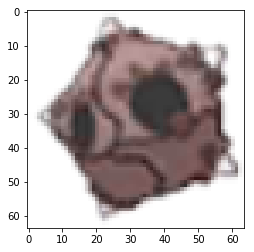

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 5
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 5


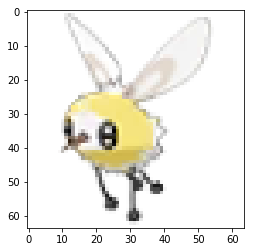

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 17
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 6


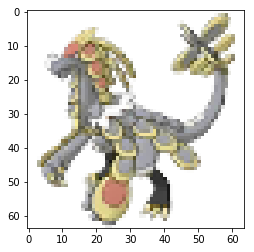

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 15
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 15


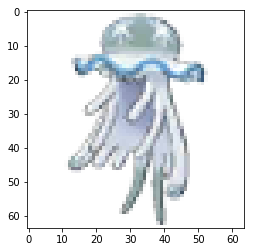

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


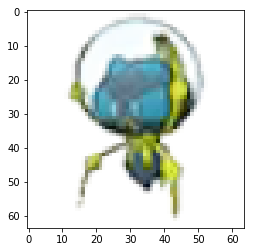

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 6
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


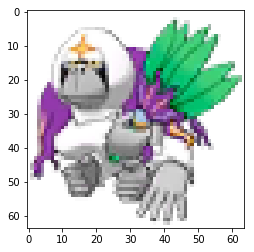

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


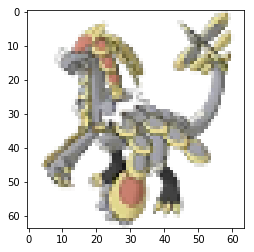

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 15


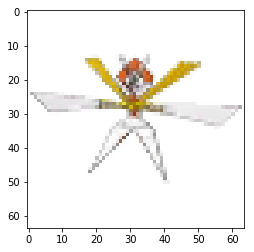

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 8
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1
**********************************
Finished ::  aaTariq8.csv
*********************************


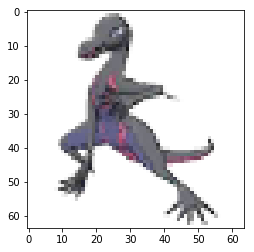

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 1
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 16


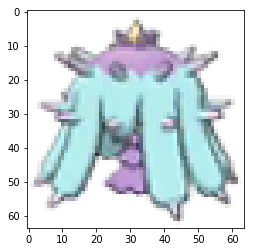

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 3
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 13


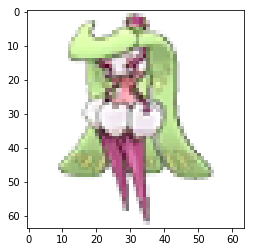

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 13


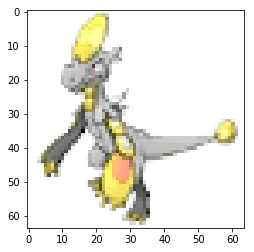

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 15
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 15


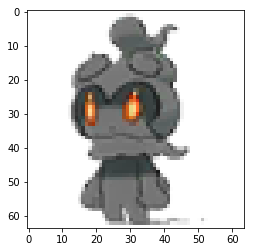

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 9
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 7


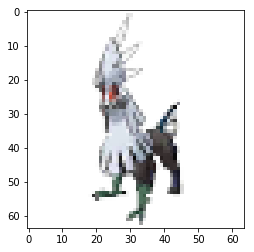

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


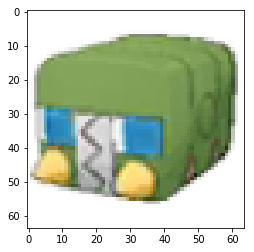

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 6
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 6


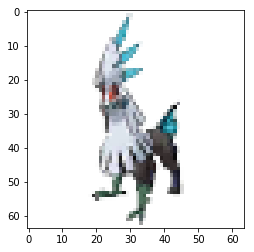

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


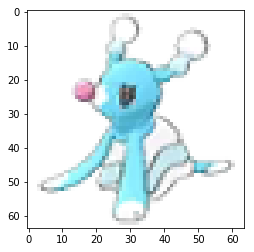

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 10
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 10


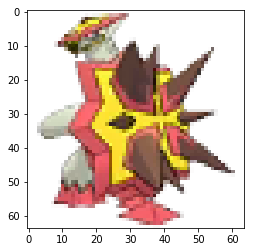

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 15
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 9


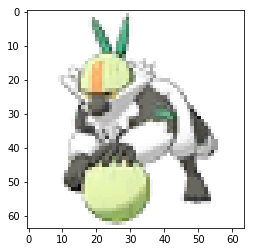

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 11
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 1


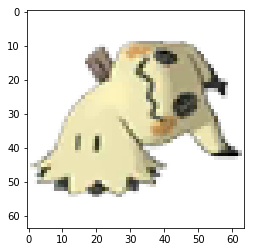

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 8
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 12


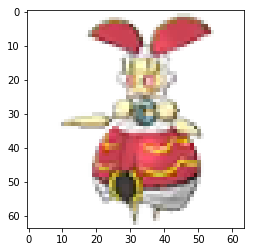

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 17
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 8


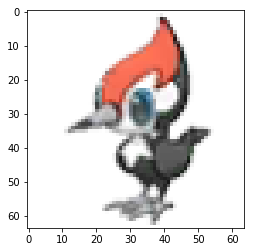

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 2


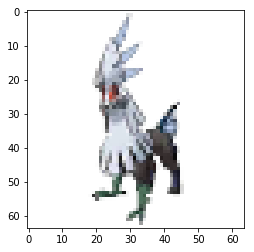

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 0
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 0


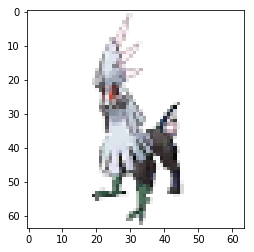

{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the First Type (based on the index) :: 17
{0: 'normal', 1: 'fighting', 2: 'flying', 3: 'poison', 4: 'ground', 5: 'rock', 6: 'bug', 7: 'ghost', 8: 'steel', 9: 'fire', 10: 'water', 11: 'grass', 12: 'electric', 13: 'psychic', 14: 'ice', 15: 'dragon', 16: 'dark', 17: 'fairy', 18: 'None'}
Enter the Second Type (based on the index :: 17
**********************************
Finished ::  aaTariq9.csv
*********************************


In [109]:
#Pulls only the pokemon from the specified generation
gen_df = df.loc[ (df["dex_number"] >= min_bnd) & (df["dex_number"] <= max_bnd)]

classes = list(gen_df)[2:]

row_keys = ["pokemon","dex_number","normal","fighting","flying","poison","ground",
        "rock","bug","ghost","steel","fire",
        "water","grass","electric","psychic","ice","dragon","dark","fairy"]
row_vals = [""]+[0]*(len(row_keys)-1)

#Create a dictionary to map inputs (numbers) to classes (types)
class_dict = {}
for i in range(0,len(classes)):
    class_dict[i] = classes[i]
class_dict[i+1] = "None"



for t in range(0, num_batches):
    howmany = len(gen_df)//num_batches
    
    if(t==num_batches-1):
        #The last batch might not have the same number of stuff in it
        #So just take everything
        makeCSVPart(randomized_idces[howmany*t:],label=myName, part=str(t))
    else:
        makeCSVPart(randomized_idces[howmany*t:howmany*t+howmany],label=myName, part=str(t))

    

# Merge all of the smaller CSV files into 1 large file

In [122]:
files = sorted([f for f in os.listdir(gen_folder) if f.startswith(myName) and f.endswith(".csv")])
print(files)

mainFrame = pd.DataFrame(columns=list(gen_df))

for f in files:
    thisFrame = pd.read_csv(os.path.join(gen_folder, f))
    mainFrame = pd.concat([mainFrame, thisFrame])
    
mainFrame.sort_values("dex_number", inplace=True, ascending=True)
writeable_mainFrame = mainFrame.to_csv(os.path.join(gen_folder, "a"+myName+".csv"), encoding="utf-8", index=False)

['aaTariq0.csv', 'aaTariq1.csv', 'aaTariq2.csv', 'aaTariq3.csv', 'aaTariq4.csv', 'aaTariq5.csv', 'aaTariq6.csv', 'aaTariq7.csv', 'aaTariq8.csv', 'aaTariq9.csv']


# Observe user's metrics

True Pos   ::  [10.  5.  9.  4.  2.  5. 11.  5.  6.  5.  9.  8.  4.  2.  0.  7.  1.  4.]
False Neg  ::  [ 3.  7.  8.  4.  3.  8.  2.  9.  3.  4.  6.  6.  5. 11.  2.  3.  2. 13.]
False Pos  ::  [12. 16. 10.  3.  3.  2.  3.  3.  4.  5.  8.  8.  7.  4.  3.  1. 16.  7.]
Actual dist::  [13. 12. 17.  8.  5. 13. 13. 14.  9.  9. 15. 14.  9. 13.  2. 10.  3. 17.]


/home/tariq/PokemonTypeNN/utility/evaluation.py:162: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * precision * recall/ (precision + recall)


0.49489795918367346


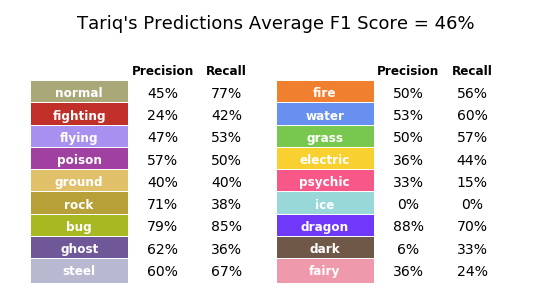

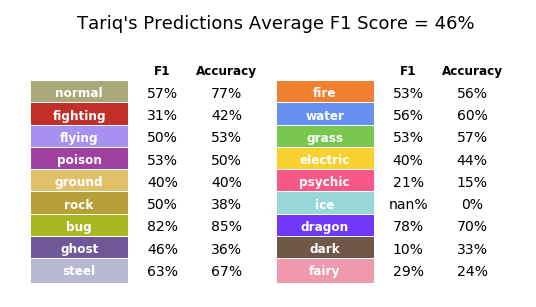

In [6]:
mainFrame = pd.read_csv(os.path.join(gen_folder, "a"+myName+".csv"))
gen_df = pd.read_csv(os.path.join(gen_folder, "aa_masterlist.csv"))
gen_df = df.loc[ (df["dex_number"] >= min_bnd) & (df["dex_number"] <= max_bnd)]
classes = list(gen_df)[2:]

figure_folder = os.path.join(os.getcwd(), "figures")

true_pos = np.zeros(18)
false_neg = np.zeros(18)
false_pos = np.zeros(18)
actual_dist = np.zeros(18)

for i in range(0, len(mainFrame)):
    for j in range(0, len(classes)):
        if( mainFrame[classes[j]].iloc[i] ==1 and gen_df[classes[j]].iloc[i] == 1 ):
            true_pos[j] += 1
        
        elif(mainFrame[classes[j]].iloc[i] == 1 and gen_df[classes[j]].iloc[i] == 0):
            false_pos[j] += 1
        
        elif(mainFrame[classes[j]].iloc[i] == 0 and gen_df[classes[j]].iloc[i] == 1):
            false_neg[j] += 1
            
        if(gen_df[classes[j]].iloc[i] == 1):
            actual_dist[j] += 1
            
print("True Pos   :: ", true_pos)
print("False Neg  :: ", false_neg)
print("False Pos  :: ", false_pos)
print("Actual dist:: ", actual_dist)
metrics = getMetrics(true_pos=true_pos, false_pos=false_pos, false_neg=false_neg, actual_dist=actual_dist)

plot_evaluation("Tariq's Predictions", "Precision", metrics["precision"], "Recall", metrics["recall"], 
                "F1", metrics["mean_F1"])

plt.savefig(os.path.join(figure_folder,"tariq_precision_recall.png"))

plot_evaluation("Tariq's Predictions", "F1", metrics["F1"], "Accuracy", metrics["accuracy"], 
                "F1", metrics["mean_F1"])

plt.savefig(os.path.join(figure_folder,"tariq_f1_accuracy.png"))

print(metrics["mean_accuracy"])

In [123]:
print(mainFrame)
print(gen_df)

                  pokemon dex_number normal fighting flying poison ground  \
0              rowlet.png        722      0        0      1      0      0   
0             dartrix.png        723      0        0      1      0      0   
1           decidueye.png        724      0        0      1      0      0   
1              litten.png        725      0        0      0      0      0   
0            torracat.png        726      0        0      0      0      0   
0          incineroar.png        727      0        1      0      0      0   
1             popplio.png        728      0        0      0      0      0   
0             brionne.png        729      0        0      0      0      0   
1           primarina.png        730      0        0      0      0      0   
1             pikipek.png        731      1        0      1      0      0   
2            trumbeak.png        732      1        0      1      0      0   
0           toucannon.png        733      1        0      1      0      0   

In [156]:
("{} Average"+"dog"+"Score = {:.0%}").format("hello", 4)

'hello AveragedogScore = 400%'